In [84]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, auc,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
## Load the data set
df = pd.read_pickle('sampled_data_bands_m2.pkl')





df.band.replace('Metallica',0,inplace=True)
df.band.replace('Rush',1,inplace=True)
df.reindex()

X = df.drop(['band','track_names','index'],axis=1)
y = df['band']
# X['bpm'] = pd.to_numeric(X['bpm'], errors='coerce').fillna(0)
# X['harmonic_rythmic_ratio'] = pd.to_numeric(X['harmonic_rythmic_ratio'], errors='coerce').fillna(0)
# X['spectral_centroid'] = pd.to_numeric(X['spectral_centroid'], errors='coerce').fillna(0)
# X['spectral_flatness'] = pd.to_numeric(X['spectral_flatness'], errors='coerce').fillna(0)
# X['count_delta_above_mean'] = pd.to_numeric(X['count_delta_above_mean'], errors='coerce').fillna(0)
# X['ratio_above_rmse_mean'] = pd.to_numeric(X['harmonic_rythmic_ratio'], errors='coerce').fillna(0)
# X['max_rmse'] = pd.to_numeric(X['spectral_centroid'], errors='coerce').fillna(0)
# X['mean_rms'] = pd.to_numeric(X['spectral_flatness'], errors='coerce').fillna(0)



#np.isnan(y.any()) #and gets False
#and gets True
#X = X.as_matrix().astype(np.float)
#y = y.as_matrix().astype(np.float)

In [85]:
%%time
### try knn, then write a function to explore the rest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ssX = StandardScaler()
X_train_scaled = ssX.fit_transform(X_train)
X_test_scaled  = ssX.transform(X_test)

CPU times: user 70.5 ms, sys: 14.3 ms, total: 84.8 ms
Wall time: 27.3 ms


In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train_scaled)
pcafeatures_train = pca.fit_transform(X_train_scaled)
pcafeatures_test = pca.transform(X_test)

/Users/mcassettix/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


CPU times: user 10.4 s, sys: 105 ms, total: 10.5 s
Wall time: 9.87 s


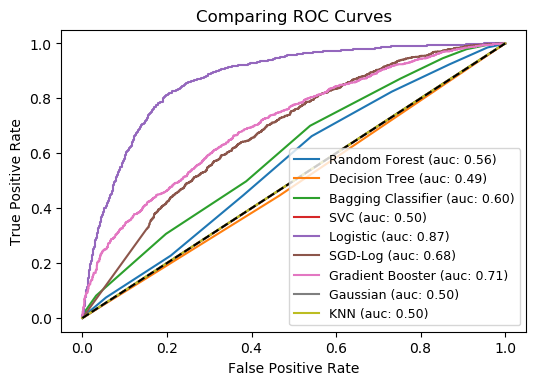

In [87]:
%%time
models = [RandomForestClassifier(), DecisionTreeClassifier(),BaggingClassifier(base_estimator=DecisionTreeClassifier()),
          SVC(kernel='rbf',probability=True),LogisticRegression(), SGDClassifier(loss='log', random_state=42),GradientBoostingClassifier(),GaussianNB(),KNeighborsClassifier()]
model_names = ["Random Forest", "Decision Tree",'Bagging Classifier','SVC','Logistic','SGD-Log','Gradient Booster','Gaussian','KNN']

roc_plotting_stuff = []
for clf, name in zip(models, model_names):
    clf.fit(pcafeatures_train, y_train)
    preds = clf.predict_proba(pcafeatures_test)
    fpr, tpr, _ = roc_curve(y_test, preds[:,1])
    auc_score = auc(fpr, tpr)
    roc_plotting_stuff.append((name, tpr, fpr, auc_score))

plt.figure(dpi=100)
for name, tpr, fpr, auc_score in roc_plotting_stuff:
    plt.plot(fpr, tpr, label=name+' (auc: %.2f)'%auc_score)
    
plt.legend(loc='lower right', fontsize=9)
plt.plot([0, 1], [0, 1], color='k', linestyle='--');
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparing ROC Curves");

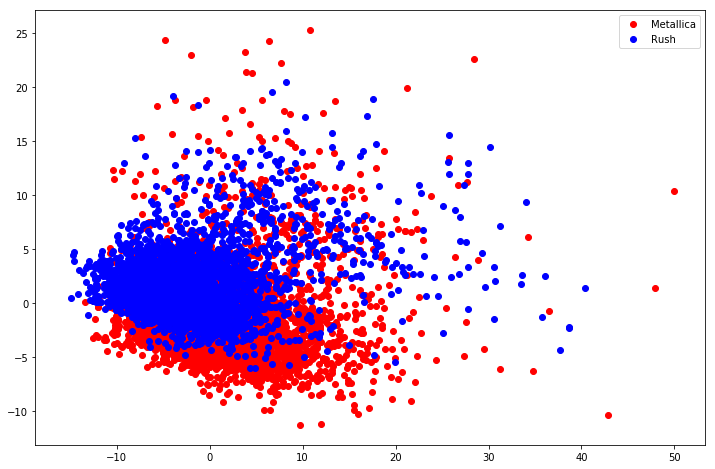

In [88]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','b','g','c','m','y','orange','k','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

    
plot_PCA_2D(pcafeatures_train, target=y_train.astype(int), target_names=['Metallica', 'Rush'])
plt.gcf().set_size_inches(12,8)
    

In [89]:
from sklearn.manifold import TSNE

Xsne = TSNE(n_components=2,perplexity=100.0).fit_transform(X_train_scaled[:1000,:])


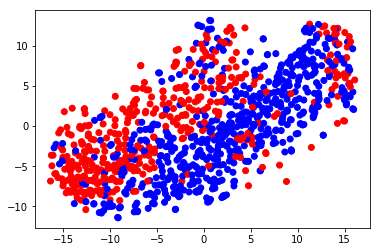

In [90]:
plt.scatter(Xsne[:,0],Xsne[:,1],c=['r' if band==1 else 'b' for band in y_train])

In [15]:
#import seaborn as sns; sns.set(font_scale=1.2)
#sns.pairplot(df, hue='band')

In [16]:
### Try a bunch of models

In [91]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [92]:
#svc = SVC(probability=True)
models = [('knn', KNN), 
          ('logistic', LogisticRegression),
          ('tree', DecisionTreeClassifier),
          ('forest', RandomForestClassifier),
          ('GB',GradientBoostingClassifier),
          
         ]

param_choices = [
    {
        'n_neighbors': range(1, 12),
        'weights': ['uniform', 'distance']
    },
    {
        'C': np.logspace(-3,6, 12),
        'penalty': ['l1', 'l2']
    },
    {
        
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
       'n_estimators': [50, 100, 200],
       'max_depth': [1,2,3,4,5],
       'min_samples_leaf': [3,6,10]
    },
    {
        'random_state':[42]
    }
 
]
    
    


grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params,cv=10, scoring='accuracy')
    grid.fit(pcafeatures_train, y_train)
    s = f"{name}: best score: {grid.best_score_}"
    print(s)
    grids[name] = grid

knn: best score: 0.8913645352669743
logistic: best score: 0.791430454845089
tree: best score: 0.8073829927488464
forest: best score: 0.82636783124588
GB: best score: 0.8437705998681608


In [99]:
# Let's get the testing score
grids['GB'].best_estimator_.score(pcafeatures_test, y_test)

0.666256536450323

In [100]:
pred = grids['GB'].best_estimator_.predict(pcafeatures_test)
rep = classification_report(y_test, pred)
print(rep)

             precision    recall  f1-score   support

          0       0.67      0.84      0.75      1877
          1       0.67      0.42      0.52      1374

avg / total       0.67      0.67      0.65      3251



In [101]:
# Let's get the testing score
grids['GB'].best_estimator_.score(pcafeatures_test, y_test)
pred = grids['GB'].best_estimator_.predict(pcafeatures_test)
rep = classification_report(y_test, pred)
print(rep)

             precision    recall  f1-score   support

          0       0.67      0.84      0.75      1877
          1       0.67      0.42      0.52      1374

avg / total       0.67      0.67      0.65      3251



In [102]:
grids['GB'].best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [30]:
#import seaborn as sns; sns.set(font_scale=1.2)
#sns.pairplot(df.drop('index',axis=1), hue='band')

In [103]:
prediction_hard = grids['GB'].best_estimator_.predict(pcafeatures_test)
actual = y_test
accuracy_score(y_test,prediction_hard)

0.666256536450323

In [32]:
#%%time
### Tune the hyper parameters of svm if possible and refit!

#models = [('svm',SVC)]

#gamma_range = np.logspace(-2, 0, 5)
#C_range = np.logspace(1.75,2.5,5)

#param_choices = [

#    {
#        'C': C_range, 
#        'kernel': ['rbf'],
#        'gamma': gamma_range,
#         'probability': [True]
#    },
 
#]
#grids = {}
#for model_info, params in zip(models, param_choices):
#    name, model = model_info
#    print(name,model)
#    grid = GridSearchCV(model(), params)
#    grid.fit(X_train_scaled, y_train)
#    s = f"{name}: best score: {grid.best_score_}"
#    print(s)
#    grids[name] = grid

In [33]:
## find which features separate the most...?? of the ones that mis-classify, 
## what is having the most trouble
### do other approach... then get two proba
#### logisitic regression with the proba

In [107]:
## EXPORT MODEL 1
from sklearn.pipeline import Pipeline
import pickle

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('GB', GradientBoostingClassifier(**grids['GB'].best_params_))])
pipeline.fit(X_train,y_train)
pickle.dump(pipeline, open('model3.pkl', 'wb'))

test_data = [pcafeatures_test,y_test]
pickle.dump(test_data,open('test_data3.pkl','wb'))

In [105]:
train_data = [pcafeatures_train,y_train]
pickle.dump(train_data,open('training_data3.pkl','wb'))